### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [3]:
lista_alumnos = [["Pedro", 47, 1.80],
                 ["Tomás", 31, 1.80],
                 ["Ana", 39, 1.65],
                 ["Natalio", 29, 1.73],
                 ["Monica", 47, 1.73],
                 ["Jose", 24, 1.75],
                 ["Carolina", 34, 1.64],
                 ["Alberto", 36, 1.60],
                 ["Cristina", 46, 1.70],
                 ["Alba", 29, 1.68],
                 ["Laura", 40, 1.60],
                 ["Luis", 47, 1.69],
                 ["Jaime", 38, 1.60],
                 ["Fernando", 51, 1.75]]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
# df
df = pd.DataFrame(lista_alumnos, columns = ["Nombre", "Edad", "Altura"])
df.head()


,Nombre,Edad,Altura
0,Pedro,47,1.80
1,Tomás,31,1.80
2,Ana,39,1.65
3,Natalio,29,1.73
4,Monica,47,1.73


In [5]:
edad = [     e[1] for e in lista_alumnos    ]
altura = [e[2] for e in lista_alumnos]
print(edad)
print(altura)

[47, 31, 39, 29, 47, 24, 34, 36, 46, 29, 40, 47, 38, 51]
[1.8, 1.8, 1.65, 1.73, 1.73, 1.75, 1.64, 1.6, 1.7, 1.68, 1.6, 1.69, 1.6, 1.75]


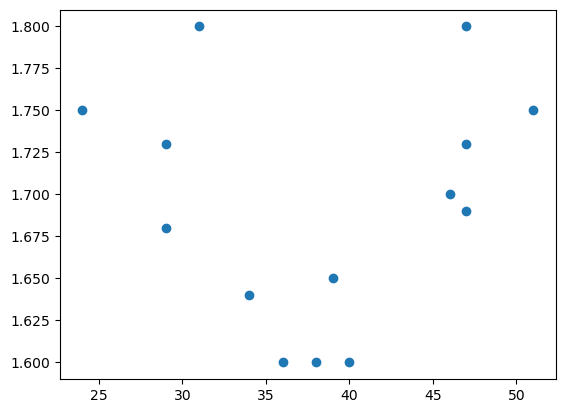

In [6]:
plt.scatter(edad, altura)

In [7]:
# Obtener X_train, X_test, y_train, y_test, semilla 42
X = df[["Edad"]]
y = df[["Altura"]]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)


In [9]:
print(X_train.shape)
print(X_test.shape)

(11, 1)
(3, 1)


In [10]:
# modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)

[1.72049685] [[-0.00090474]]


Text(0.5, 0, 'Edad')

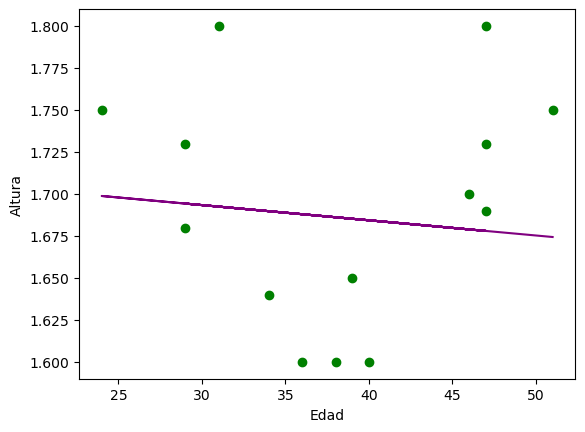

In [11]:
# dibujar la regresión lineal y los puntos con un diagrama de dispersión 
plt.scatter(X, y, color="green")
plt.plot(X, model.predict(X), color="purple")
plt.ylabel("Altura")
plt.xlabel("Edad")

In [12]:
X

,Edad
0,47
1,31
2,39
3,29
4,47
5,24
6,34
7,36
8,46
9,29


In [13]:
type(model.predict(X))

numpy.ndarray

array([[47],
       [31],
       [39],
       [29],
       [47],
       [24],
       [34],
       [36],
       [46],
       [29],
       [40],
       [47],
       [38],
       [51]], dtype=int64)

(14, 1)

In [14]:
model.predict(X).tolist()

[[1.6779742677251572],
 [1.6924500410621406],
 [1.685212154393649],
 [1.6942595127292635],
 [1.6779742677251572],
 [1.6987831918970706],
 [1.689735833561456],
 [1.6879263618943332],
 [1.6788790035587187],
 [1.6942595127292635],
 [1.6843074185600875],
 [1.6779742677251572],
 [1.6861168902272103],
 [1.6743553243909113]]

In [15]:
lista_tot = []
for i in model.predict(X).tolist():
    lista_tot.append(i[0])
lista_tot


[1.6779742677251572,
 1.6924500410621406,
 1.685212154393649,
 1.6942595127292635,
 1.6779742677251572,
 1.6987831918970706,
 1.689735833561456,
 1.6879263618943332,
 1.6788790035587187,
 1.6942595127292635,
 1.6843074185600875,
 1.6779742677251572,
 1.6861168902272103,
 1.6743553243909113]

In [22]:
df['predicciones'] = lista_tot
df['residuos'] = df['Altura'] - df['predicciones']
df


,Nombre,Edad,Altura,predicciones,residuos
0,Pedro,47,1.80,1.677974,0.122026
1,Tomás,31,1.80,1.692450,0.107550
2,Ana,39,1.65,1.685212,-0.035212
3,Natalio,29,1.73,1.694260,0.035740
4,Monica,47,1.73,1.677974,0.052026
5,Jose,24,1.75,1.698783,0.051217
6,Carolina,34,1.64,1.689736,-0.049736
7,Alberto,36,1.60,1.687926,-0.087926
8,Cristina,46,1.70,1.678879,0.021121
9,Alba,29,1.68,1.694260,-0.014260


In [16]:
print('MSE:', mean_squared_error(y_test, model.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

MSE: 0.005079410425744613
RMSE: 0.0712699826416747


In [17]:
#df_corr
df_corr = df[['Edad', 'Altura']].corr()

<Axes: >

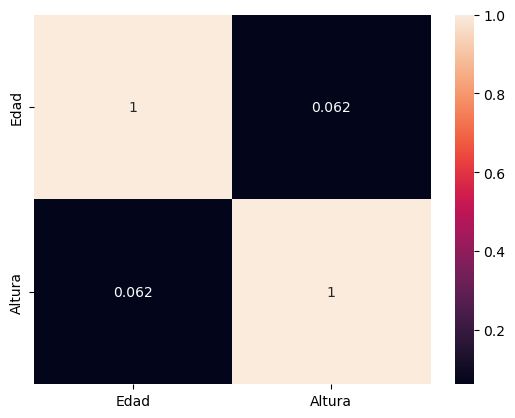

In [18]:
# heatmap
sns.heatmap(df_corr, annot=True)